# Exploratory Data Analysis with Pandas (part 1)
Now that we have the fundamental knowledge about Python and in particular Pandas we can start to do some exploratory data analysis (EDA). EDA is the first step in the data science process and it is very important to understand the data that we are working with. EDA is used by data scientists to understand the data, to identify patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.


In this notebook, we will see how to load data, and do an initial exploration of the data over the titanic dataset.  In 1912, during its maiden voyage, the widely considered "unsinkable" RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
With this analysis, we will be able to answer some questions like:
- What is the distribution of the passengers by age?
- Who were the passengers in the Titanic?
- What deck were the passengers on and how does that relate to their class?
- Where did the passengers come from?
- Who was alone and who was with family?
- What factors helped someone survive the sinking?
- Did the deck have an effect on the passengers survival rate?
- Did having a family member increase the odds of surviving the crash?
- etc.

## Load the data
Let's start with the Titanic data set. This is a very famous data set that is used to demonstrate data analysis and machine learning. It is a very small data set, but it is a good place to start. The data set is available, e.g., on Kaggle (https://www.kaggle.com/datasets/vinicius150987/titanic3)

In [1]:
# if necessary upgrade your versiosn of pandas and jinja2
#!pip install --upgrade pandas
#!pip install --upgrade jinja2

# load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [2]:
df = pd.read_excel('./data/titanic/Titanic.xls')
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,1,NaN,London / Paris
2,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,1,NaN,London / Paris
3,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,1,NaN,NaN
4,1,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,26.0000,NaN,S,1,NaN,"New York, NY"
5,1,1,"Stengel, Mr. Charles Emil Henry",male,54.0,1,0,11778,55.4417,C116,C,1,NaN,"Newark, NJ"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
8,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
9,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"


Our data set has 1309 rows and 14 columns. Let's see what the columns and their data types are.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


The columns are:
- pclass: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)
- survived: Survival (0 = No; 1 = Yes)
- name: Name
- sex: Sex  (male = Male; female = Female)
- age: Age  (in years)
- sibsp: Number of siblings/spouses aboard. The dataset defines family relations in this way:
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: Number of Parents/Children Aboard. The dataset defines family relations in this way:
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.
- ticket: Ticket Number
- fare: Passenger Fare
- cabin: Cabin Number
- embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat: Lifeboat Number
- body: Body Number (if did not survive and body was recovered)
- home.dest: Home/Destination

We can see that there are missing values in the age and body columns. This is also visible running the describe method. The include='all' argument allows to see the summary of the non-numerical columns (to include top - most frequent value; freq - frequency of the most frequent value; unique - number of unique values; and the other seams to be self-explanatory.

In [4]:
df.describe(include='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,939,NaN,186,3,28,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


Let us add a new column to the data frame with the family size. This is the sum of the number of siblings/spouses and the number of parents/children, plus 1 for the passenger itself.

In [5]:
df['family_size'] = df['sibsp'] + df['parch'] + 1
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,family_size
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,1,NaN,London / Paris,2
2,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,1,NaN,London / Paris,2
3,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,1,NaN,NaN,1
4,1,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,26.0000,NaN,S,1,NaN,"New York, NY",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,2
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,2
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,1
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,1


## Plotting the data (a first look)
We can plot the **histogram** of the numerical columns to see how the data is distributed. (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)

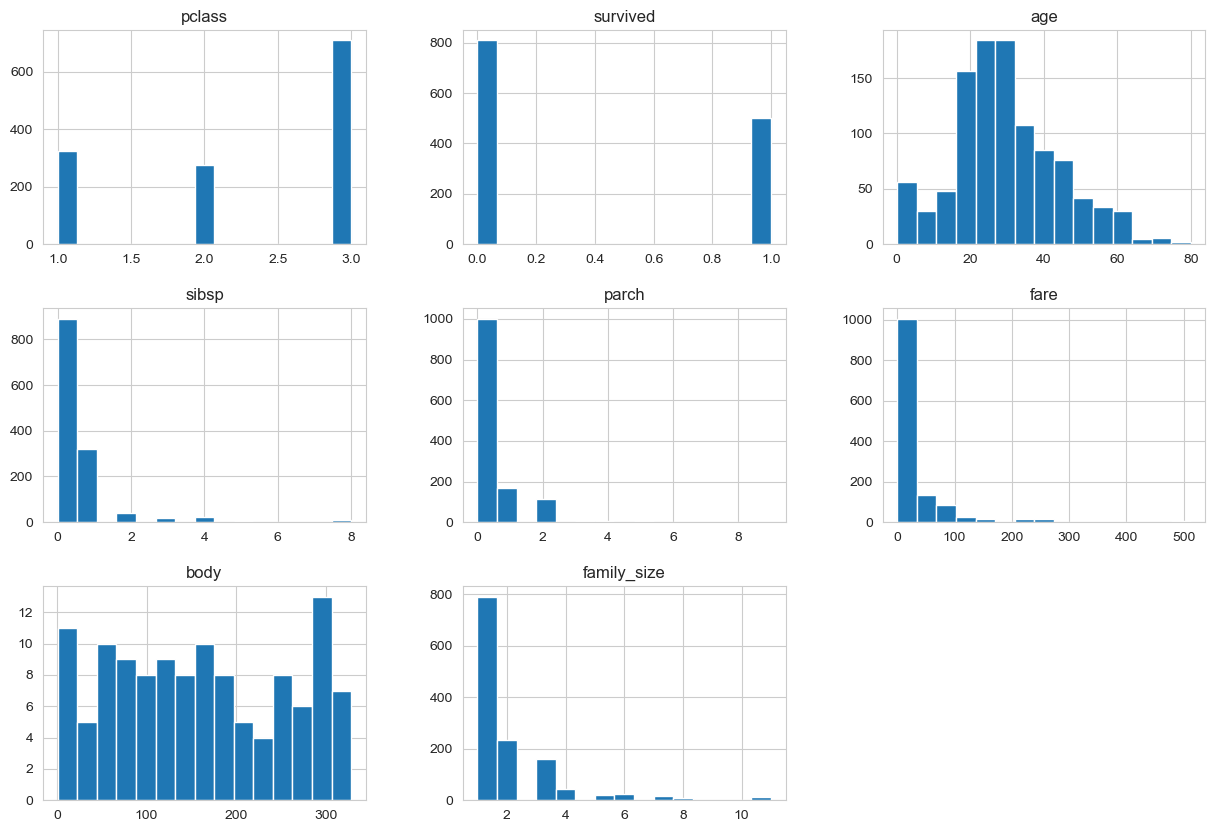

In [6]:
# plot histograms of the numerical columns
_ = df.hist(figsize=(15, 10), bins=15)

<span style="color:red"> - what conclusion can you draw from the histogram of the age column? </span>

<span style="color:red"> - what conclusion can you draw from the histogram of the fare column? </span>.

It is also useful to plot the bar charts of the categorical columns. We can do this using the value_counts() method from Pandas to get the count of unique values in each column and then plot the bar charts. (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

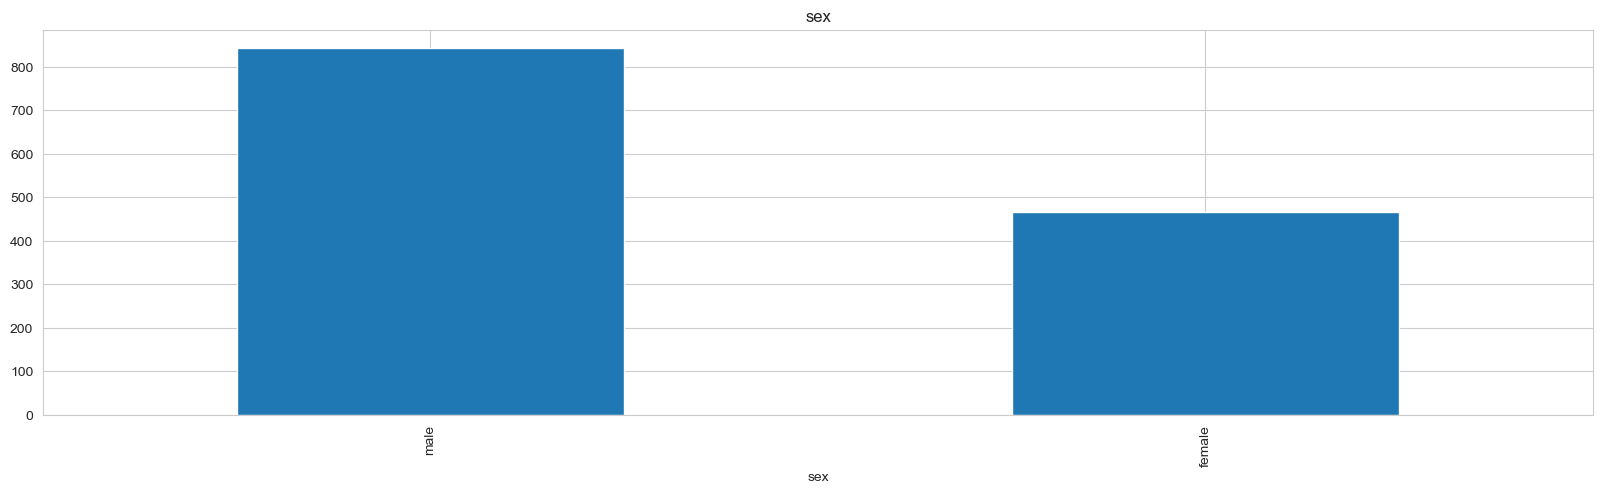

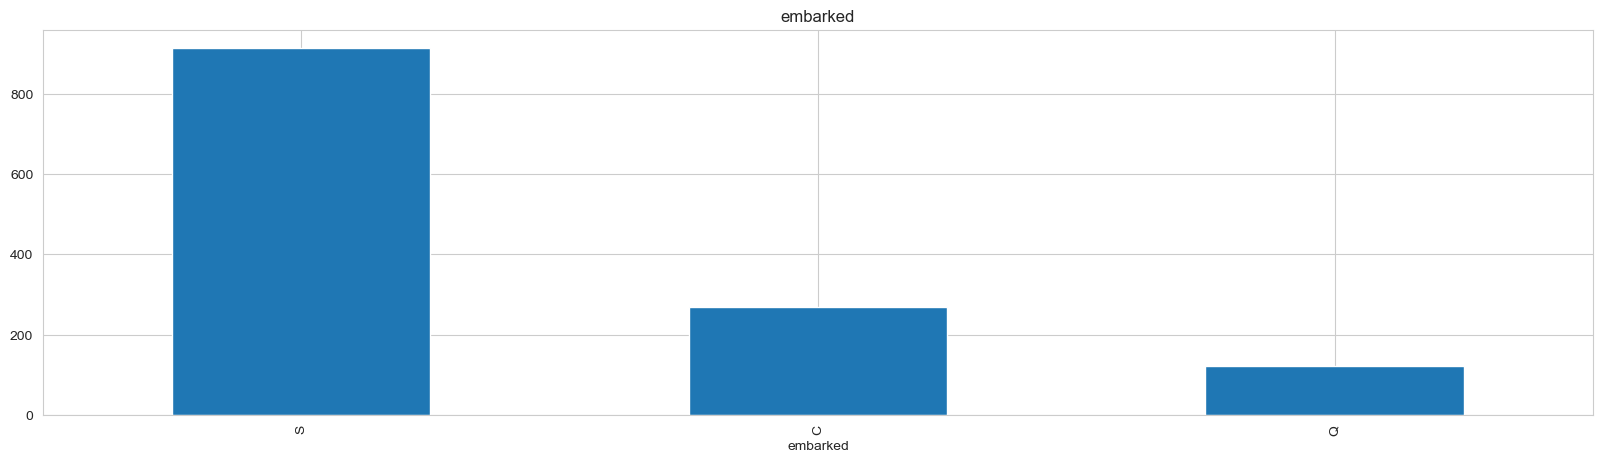

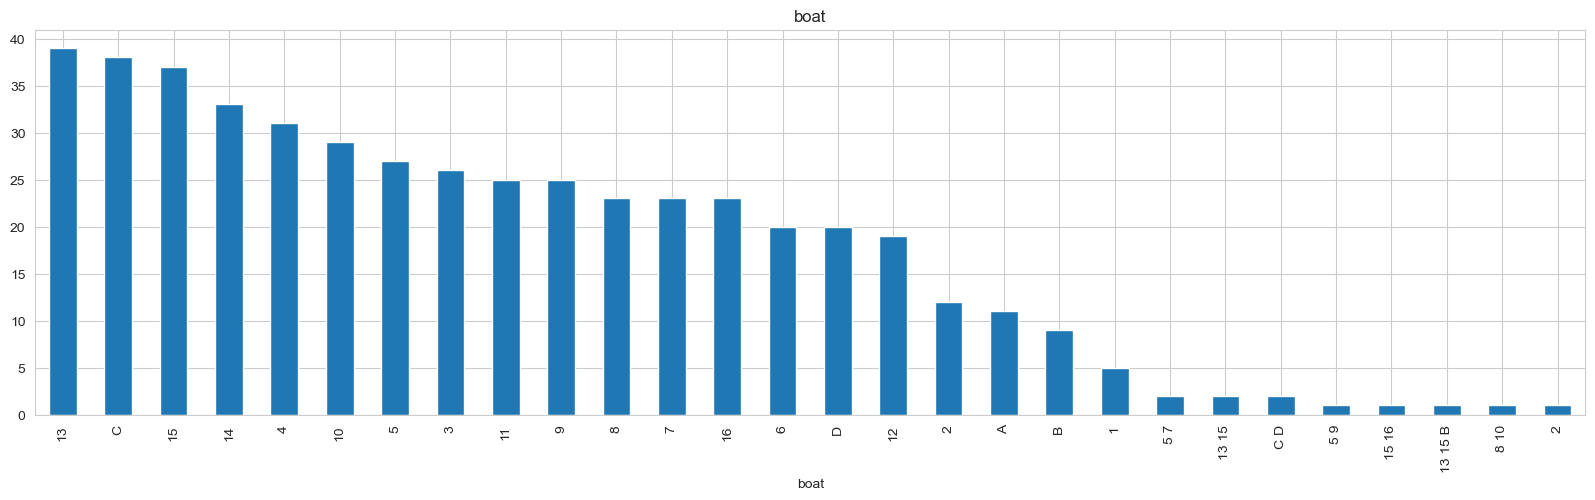

In [7]:
# get the categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# plot the bar charts of the categorical columns
for col in cat_cols:
    df_temp = df[col].value_counts()
    # plot only the dataframes with less than 30 unique values - this will remove, e.g., the name, ticket and cabin column
    if df_temp.size < 30:
        df_temp.plot(kind='bar', title=col, figsize=(20, 5))
        plt.show()

<span style="color:red"> - what conclusion can you draw from the bar charts? </span>

## Pivot tables and group by methods

Pivot tables and group by methods are a very useful tool to summarize data.
### Pivot table
The pivot table method allows to summarize data by grouping the data by one or more columns and applying an aggregation function to the other columns. The pivot_table method is very similar to the groupby method. Its arguments include:
- index: column(s) to group by on the rows
- columns: column(s) to group by on the columns
- values: column(s) to apply the aggregation function on
- aggfunc: aggregation function to apply. Default is mean if values is a numerical column and count if values is a categorical column. Other possible values are sum, min, max, std, var, median, first, last, nunique, and size.
- fill_value: value to replace missing values, default is 0. If you want to keep the missing values, you can use np.nan.
- margins: add row/column subtotals and grand total (default is False)
- margins_name: name of the row/column subtotals and grand total (default is 'All')
- dropna: do not include columns whose entries are all NaN (default is True)

For example, if you want to summarize the number of survived passengers into a pivot table with sex and pclass as the index and columns, respectvely, you can do the call below. In this case, the aggfunc is sum as we want to count the number of survived passengers and survived is a boolean column, where 1 survived and 0 did not survive.

In [8]:
pt = df.pivot_table(index='sex', 
                    values='survived', 
                    columns='pclass', 
                    aggfunc='sum', 
                    margins=True, 
                    margins_name='Total')
pt

pclass,1,2,3,Total
sex,,,,
female,139,94,106,339
male,61,25,75,161
Total,200,119,181,500


<span style="color:red"> What was the total number of passengers that survived? </span>

<span style="color:red"> How many passerenger from class 1 survived? </span>

<span style="color:red"> How many female passengers survived? </span>

<span style="color:red"> Who did survive more: females or males? </span>

To present the pivot table with percentages we can divide it by the total number of passengers that survived.

In [9]:
number_of_survived = sum(df['survived'])
pt / number_of_survived * 100

pclass,1,2,3,Total
sex,,,,
female,27.8,18.8,21.2,67.8
male,12.2,5.0,15.0,32.2
Total,40.0,23.8,36.2,100.0


<span style="color:red"> In a similar manner, how can you summarize the passengers that did not survive? </span>

In [10]:
pt_all = df.pivot_table(index='sex', 
                        columns='pclass', 
                        values='survived', 
                        aggfunc='count', 
                        margins=True,  
                        margins_name='Total'
                       )
pt_all

pclass,1,2,3,Total
sex,,,,
female,144,106,216,466
male,179,171,493,843
Total,323,277,709,1309


In [11]:
pt_all - pt

pclass,1,2,3,Total
sex,,,,
female,5,12,110,127
male,118,146,418,682
Total,123,158,528,809


In [12]:
# df['dead'] = 1-df['survived']

The pivot table can be plotted using a bar plot showing the number of survived passerger by gender a passenger class. The drop method is used to drop the Total row and column from the pivot table.

Besides, we are also using __pandas Bokeh__ to plot the pivot table. This is a wrapper around the bokeh library that allows to plot pandas dataframes and series. The plot method has approximatly the same arguments as the pivot_table method. The plot method returns a bokeh figure object that can be used to customize the plot. For example, we can change the title of the plot and the labels of the axes.

In [13]:
_ = pt.drop('Total', axis=1).drop('Total', axis=0).plot_bokeh(kind='bar', title='Survived passengers per gender and class')

The stacked bar plot is useful to more easily see the proportion of survived passengers within each gender and passenger class.

In [14]:
# pt.drop('Total', axis=1).drop('Total', axis=0).plot(kind='bar', stacked=True)
_ = pt.drop('Total', axis=1).drop('Total', axis=0).plot_bokeh(kind='bar', stacked=True, title='Survived passengers per gender and class')


The transpose of the pivot table allows for a different visualization (note the ".T"). Now, each bar is associated to the class.

In [15]:
pt.T

sex,female,male,Total
pclass,,,
1,139,61,200
2,94,25,119
3,106,75,181
Total,339,161,500


And the corresponding bar plot is:

In [16]:
# pt.drop('Total', axis=1).drop('Total', axis=0).T.plot(kind='bar', stacked=True)
_ = pt.drop('Total', axis=1).drop('Total', axis=0).T.plot_bokeh(kind='bar', stacked=True)

Another interesting graph are pie plots.

In [17]:
#pt.drop('Total', axis=1).drop('Total', axis=0).plot(kind='pie', subplots=True, figsize=(15, 10), autopct='%1.1f%%')
_ = pt.drop('Total', axis=1).drop('Total', axis=0).plot_bokeh(kind='pie')

__x__values_original


In [18]:
_ = pt.T.drop('Total', axis=1).drop('Total', axis=0).plot_bokeh(kind='pie')

__x__values_original


<span style="color:red"> In which class did a greater proportion of males survive compared to females? </span>

We can make a pivot table with multiple values. For example, we can make a pivot table indexing the values of survived and sex, and columns by pclass and values by ticket (we will be just couting the ticket and, remember, the tickets' column has no missing values).

In [19]:
pt_multi = df.pivot_table(index=['survived','sex'], 
                          values='ticket', 
                          columns='pclass', 
                          aggfunc='count', 
                          margins=True, margins_name='Total')
pt_multi

pclass             1    2    3  Total
survived sex                         
0        female    5   12  110    127
         male    118  146  418    682
1        female  139   94  106    339
         male     61   25   75    161
Total            323  277  709   1309

<span style="color:red"> how many passenger were in class 1?</span>
<span style="color:red"> how many females passengers did not survive? And how many males?</span>
<span style="color:red"> how many females passengers from class 1 did not survive? And how many males?</span>

And the pie plot is given by

In [20]:
_ = pt_multi.drop('Total', axis=1).drop('Total', axis=0).plot_bokeh(kind='pie', stacked=True)

__x__values_original


<span style="color:red"> What is represented by the largest orange "arch"?</span>

### Group by method

The group by method is another way to summarize data. It is more flexible than the pivot table method, but it is more difficult to use. The groupby method is used to split the data into groups based on one or more columns and then apply an aggregation function to each group. The groupby method returns a SeriesGroupBy object. This object can be used to apply an aggregation function to each group. The aggregation function can be applied to all the columns or to a specific column. Some arguments arguments are:
- by: column(s) to group by
- axis: axis to group by (default is 0)
- as_index: group by as index (default is True)
- sort: sort group keys (default is True)
- observed: only show observed values for categorical groupers (default is False)

For example, grouping by passengers class and gender and summing the survived column gives a similar result as the pivot table above.

In [21]:
grp = df.groupby(['sex', 'pclass'])['survived'].sum()
grp

sex     pclass
female  1         139
        2          94
        3         106
male    1          61
        2          25
        3          75
Name: survived, dtype: int64

To get the same result as the pivot table, we can unstack the SeriesGroupBy object.

In [22]:
grp = grp.unstack()
grp

pclass,1,2,3
sex,,,
female,139,94,106
male,61,25,75


The second example shown above can also be done using groupby and unstack.

In [23]:
df.groupby(['survived', 'sex', 'pclass'])['ticket'].count().unstack()

pclass             1    2    3
survived sex                  
0        female    5   12  110
         male    118  146  418
1        female  139   94  106
         male     61   25   75

### Exercises
<span style="color:red"> Find the minimum/maximum fare paid by each passenger class and gender.</span>

In [24]:
df.pivot_table(index=['pclass', 'sex'], values='fare', aggfunc=['min', 'max'])

min       max
                fare      fare
pclass sex                    
1      female  25.70  512.3292
       male     0.00  512.3292
2      female  10.50   65.0000
       male     0.00   73.5000
3      female   6.75   69.5500
       male     0.00   69.5500

<span style="color:red"> Find the minimum/maximum fare paid by each adult (age>18) passenger by class and gender.</span>

<span style="color:red"> Add a row to the index of the previous pivot table dividing the results in adult and juvenile.</span>

In [25]:
df.pivot_table(index=['pclass', 'sex'], values='fare', aggfunc=['min', 'max'])

min       max
                fare      fare
pclass sex                    
1      female  25.70  512.3292
       male     0.00  512.3292
2      female  10.50   65.0000
       male     0.00   73.5000
3      female   6.75   69.5500
       male     0.00   69.5500

In [26]:
df[df['age'] >= 18].pivot_table(index=['pclass', 'sex'], values='fare', aggfunc=['min', 'max'])

min       max
                  fare      fare
pclass sex                      
1      female  25.7000  512.3292
       male     0.0000  512.3292
2      female  10.5000   65.0000
       male     9.6875   73.5000
3      female   6.7500   46.9000
       male     0.0000   56.4958

In [27]:
df_with_age_group = df.copy()
df_with_age_group['age_group'] = df['age'].apply(lambda x: 'adult' if x >= 18 else 'juvenile')
#df_with_age_group
df_with_age_group.pivot_table(index=['age_group','pclass', 'sex'], values='fare', aggfunc=['min', 'max'])

min       max
                            fare      fare
age_group pclass sex                      
adult     1      female  25.7000  512.3292
                 male     0.0000  512.3292
          2      female  10.5000   65.0000
                 male     9.6875   73.5000
          3      female   6.7500   46.9000
                 male     0.0000   56.4958
juvenile  1      female  27.7208  211.3375
                 male     0.0000  262.3750
          2      female  10.5000   41.5792
                 male     0.0000   73.5000
          3      female   7.2250   69.5500
                 male     3.1708   69.5500

## Statistical analysis

Exploratory data analysis (EDA) is not only about visualizing the data, but also about understanding the data. This is done by performing statistical analysis on it.

### Types of variables

Data types are fundamental concepts in statistical  analysis, being divided into the following main categories:
- **Nominal attributes** refer to variables that are categorized by names or labels. These variables have categorical, qualitative, and unordered values, such as brand names, product names, zip codes, gender, or marital status. The value of a nominal attribute can be represented by the symbol or name of an item. It is not meaningful to calculate the mean or median values for nominal attributes, but data analysts can calculate the mode, which is the value that appears most frequently.

- **Ordinal attributes** are variables that have names or labels with a meaningful order or ranking, but their exact magnitude is unknown. These attributes measure subjective qualities, which make them ideal for surveys that collect information on customer satisfaction, product ratings, and movie reviews. For example, customer satisfaction ratings may range from very dissatisfied to very satisfied, or the size of a drink may be classified as small, medium, or large. The median and mode are the only measures of central tendency that should  be used for ordinal attributes, as the mean cannot be calculated due to their qualitative nature.

- **Numeric attributes** are variables that are quantitatively represented as either integer or real values. For example, the number of children in a family is a numeric attribute. The mean, median, and mode are all appropriate measures of central tendency for numeric attributes.

#### Discrete and continuous variables

Variables can be divided into two main categories:
- **discrete variables** are variables that can take on only a finite number of values. For example, the number of children in a family is a discrete variable, as it can only take on the values 0, 1, 2, 3, etc.
- **continuous variables** are variables that can take on an infinite number of values. For example, the height of a person is a continuous variable, as it can take on any value between 0 and ? meters.


### Measures of central tendency
#### Mean
The mean is the most common measure of central tendency. It is the sum of all values divided by the number of values. The mean is a good measure of central tendency for continuous variables. However, it is not a good measure of central tendency for discrete variables, as it is sensitive to outliers. The mean is calculated using the following formula:
$$\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i$$
where $x_i$ is the $i$-th value of the variable and $n$ is the number of values.

For examples the mean of the age of the passengers is given by

In [28]:
df['age'].mean()

29.8811345124283


#### Median
The median is the middle value of a sorted list of values. If the number of values is even, the median is the average of the two middle values. The median is a good measure of central tendency for both discrete and continuous variables. The median is calculated using the following formula:
$$\text{median} = \begin{cases} \frac{x_{\frac{n}{2}} + x_{\frac{n+1}{2}}}{2} & \text{if } n \text{ is even} \\ x_{\frac{n+1}{2}} & \text{if } n \text{ is odd} \end{cases}$$
where $x_i$ is the $i$-th value of the variable and $n$ is the number of values.

For example, the median of the age of the passengers is given by

In [29]:
df['age'].median()

28.0

Along with the median it is usual to define the percentile of a variable. The $p$-th percentile of a variable is the value $x_p$ such that $p$% of the values are less than or equal to $x_p$. For example, the 25th percentile of the age of the passengers is given by the value such that 25% of the values are less than or equal to it.

To get the 25th percentile of the age of the passengers we can use `quantile` method with the parameter q=0.25.

In [30]:
print("25% of the passengers are younger than", df['age'].quantile(q=0.25), "years old.")

25% of the passengers are younger than 21.0 years old.


#### Mode
The mode is the value that appears most frequently in a list of values. The mode is a good measure of central tendency for nominal variables.

For example, the mode of the embarked column is given by

In [31]:
df['embarked'].mode()

0    S
Name: embarked, dtype: object

The `value_counts` method can be used to count the number of times each value appears in a column and check if the mode is correct.

In [32]:
df['embarked'].value_counts()

embarked
S    914
C    270
Q    123
Name: count, dtype: int64

### Measures of dispersion

#### Range
The range is the difference between the maximum and minimum values of a variable. The range is a good measure of dispersion for discrete variables. However, it is not a good measure of dispersion for continuous variables, as it is sensitive to outliers. The range is calculated using the following formula:
$$\text{range}(x) = x_{\text{max}} - x_{\text{min}}$$
where $x_{\text{max}}$ is the maximum value of the variable and $x_{\text{min}}$ is the minimum value of the variable.

For example, the range of the age of the passengers is given by

In [33]:
df['age'].max() - df['age'].min()

79.8333

#### Variance and standard deviation
The variance is the average of the squared differences from the mean. The variance is a good measure of dispersion for continuous variables. The variance is calculated using the following formula:
$$\text{var}(x) = \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2$$
where $x_i$ is the $i$-th value of the variable, $\bar{x}$ is the mean of the variable, and $n$ is the number of values.

For example, the variance of the age of the passengers is given by

In [34]:
df['age'].var()

207.74897359969785

On the other hand, the standard deviation is the square root of the variance. The standard deviation is also a good measure of dispersion for continuous variables. The standard deviation is calculated using the following formula:
$$\text{std}(x) = \sqrt{\text{var}(x)}.$$

The standard deviation is on the most common measure of dispersion being measured in the same units as the variable.

For example, the standard deviation of the age of the passengers is given by

In [35]:
df['age'].std()

14.413499699923605

#### Interquartile range (IQR)
The interquartile range is the difference between the 75th and 25th percentiles of a variable. The interquartile range is a good measure of dispersion for continuous variables. The interquartile range is calculated using the following formula:
$$\text{IQR}(x) = x_{75} - x_{25}$$
where $x_{75}$ is the 75th percentile of the variable and $x_{25}$ is the 25th percentile of the variable.

For example, the interquartile range of the age of the passengers is given by

In [36]:
df['age'].quantile(0.75) - df['age'].quantile(0.25)

18.0

In [37]:
df['age'].quantile(0.25)

21.0

In [38]:
df['age'].quantile(0.75)

39.0

In [39]:
df['age'].quantile(0.5)

28.0

### Measures of skewness and kurtosis

#### Skewness

Skewness measures the symmetry of a distribution. A distribution is symmetric if it looks the same to the left and right of the center point. A distribution is skewed if it is longer in one tail than the other. The skewness of a distribution is:
  - **positive if the tail on the right side of the distribution is longer** (that is, outliers are skewed to the right and data stacked up on the left) and
  - **negative if the tail on the left side of the distribution is longer**.
  - The skewness of a distribution is **zero** if the tails on both sides of the distribution are the same length.

Further positive skewness occurs when the mean is greater than the median and the mode. Negative skewness occurs when the mean is less than the median and mode.

Let us calculate the skewness of the numeric attributes of the titanic dataset.

In [40]:
numeric_attributes = df.select_dtypes(include=['int64', 'float64'])

df[numeric_attributes.columns].skew()

pclass        -0.598647
survived       0.486404
age            0.407672
sibsp          3.844220
parch          3.669078
fare           4.367709
body           0.091739
family_size    2.853078
dtype: float64

Without looking at the histogram plot:
<span style="color:red"> what conclusions can you take about the distibution of the pclass?</span>
<span style="color:red"> what conclusions can you take about the distibution of the fare?</span>
<span style="color:red"> what conclusions can you take about the distibution of the age?</span>

<span  style="color:red"> Replot the histogram of the pclass, fare and age attributes and comment on the skewness of the distributions.</span>

In [41]:
# TODO


#### Kurtosis
kurtoisis measures the tail heaviness of a distribution, i.e., whether the tails are heavy or light relative to a normal distribution. The kurtosis of a distribution is positive if the tails are heavier than a normal distribution and negative if the tails are lighter than a normal distribution.

Let us calculate the kurtosis of the numeric attributes of the titanic dataset.


In [42]:
df[numeric_attributes.columns].kurt()

pclass         -1.315079
survived       -1.766112
age             0.146950
sibsp          20.043251
parch          21.541079
fare           27.027986
body           -1.254052
family_size    10.299209
dtype: float64

In [43]:
def plot_histogram_and_normal_dist(df, column, bins=10):

    mean_age = df[column].mean()
    std_age = df[column].std()

    normal_dist = np.random.normal(mean_age, std_age, 10000)

    df[column].plot(kind='hist', figsize=(15,5), bins=bins, density=True, alpha=0.5, color='red', title=f'Histogram of a normal distribution and "{column}" which has has a swewness of {df[column].skew():.2f} and a kurtosis of {df[column].kurt():.2f}')
    plt.hist(normal_dist, bins=2*bins, density=True, alpha=0.5, color='blue')

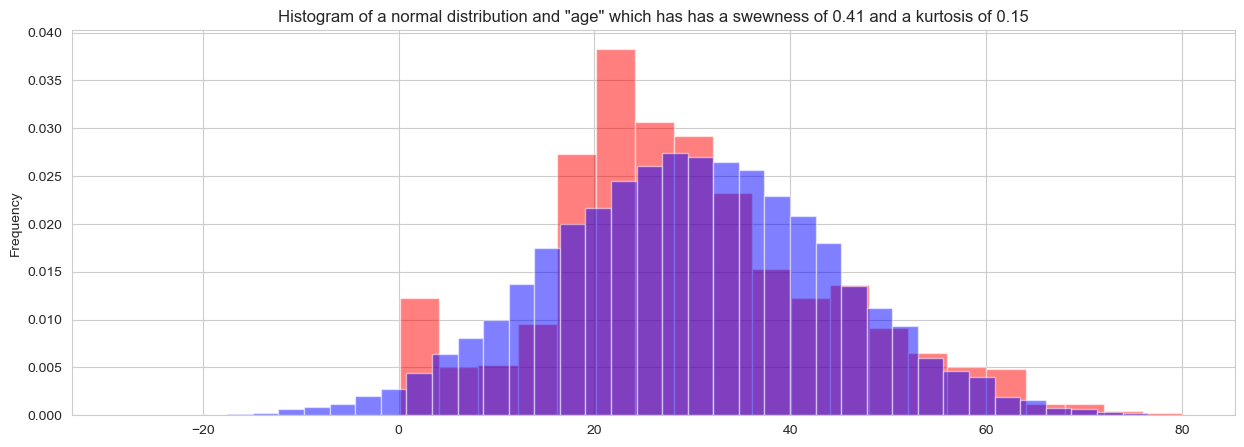

In [44]:
plot_histogram_and_normal_dist(df, 'age', bins=20)

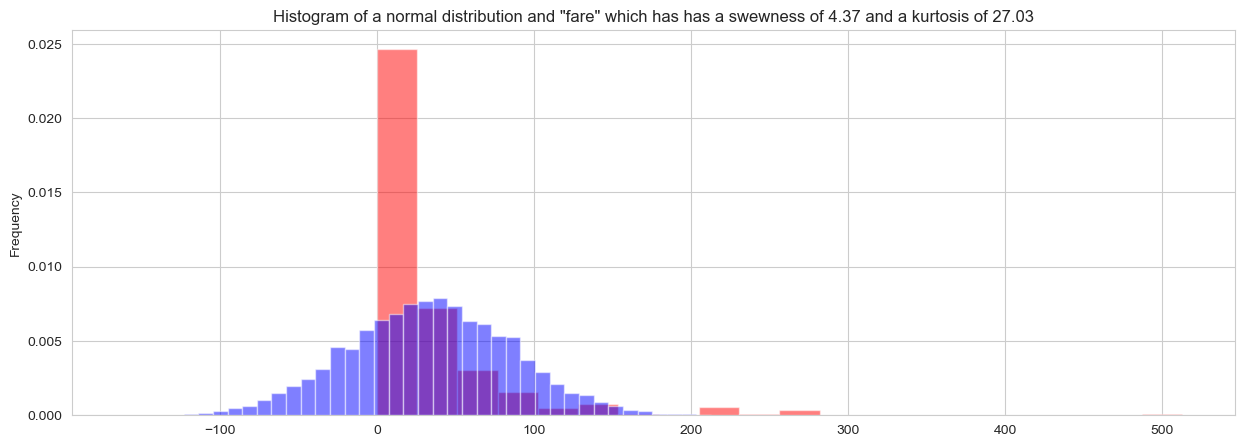

In [45]:
plot_histogram_and_normal_dist(df, 'fare', bins=20)

### Unsderstanding relationships between variables
Measuting the relationship between two variables is important in order to understand the data. There are several ways to measure the relationship between two variables. The covariance and the correlation coefficient are two of the most common.

#### Covariance

The covariance is a measure of the joint variability of two random variables. It shows the degree to which two variables change together. i.e., if the two variables tend to increase together or decrease together and by how much.

The covariance is calculated using the following formula:
$$\text{cov}(x,y) = \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})$$
where $x_i$ is the $i$-th value of the variable $x$, $\bar{x}$ is the mean of the variable $x$, $y_i$ is the $i$-th value of the variable $y$, $\bar{y}$ is the mean of the variable $y$, and $n$ is the number of values.

The covariance varies between -$\infty$ and $\infty$. The covariance is positive if the two variables tend to increase together, and negative if one variable tends to increase as the other decreases. The covariance is zero if the two variables are independent.

The problem with the covariance is that it is difficult to interpret and it is not normalized. The covariance of two variables is not comparable to the covariance of two other variables. For example, the covariance of the fare and the age of the passengers is 143.3, while the covariance of the fare and the sibps of the passengers is 8.64. The covariance of the age and the fare of the passengers is much higher than the covariance of the fare and the sibps of the passengers. However, the age and the fare of the passengers are not more related than the age and the pclass of the passengers as we can see next from the correlation matrix.


In [46]:
# select the numerical columns
numeric_attributes = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_attributes].cov()

,pclass,survived,age,sibsp,parch,fare,body,family_size
pclass,0.701969,-0.127248,-4.949878,0.053090,0.013287,-24.227788,-2.876653,0.066378
survived,-0.127248,0.236250,-0.393456,-0.014088,0.034776,6.146023,0.000000,0.020688
age,-4.949878,-0.393456,207.748974,-3.204045,-1.826666,143.339396,81.888655,-5.030710
sibsp,0.053090,-0.014088,-3.204045,1.085052,0.336833,8.641768,-8.708471,1.421885
parch,0.013287,0.034776,-1.826666,0.336833,0.749195,9.928031,4.237190,1.086028
fare,-24.227788,6.146023,143.339396,8.641768,9.928031,2678.959738,-179.164684,18.569799
body,-2.876653,0.000000,81.888655,-8.708471,4.237190,-179.164684,9544.688567,-4.471281
family_size,0.066378,0.020688,-5.030710,1.421885,1.086028,18.569799,-4.471281,2.507913



#### Correlation matrix
Correlation matrix allow to see the correlation between the numerical columns. The correlation coefficient ranges from -1 to 1. A value of 1 means that there is a perfect positive correlation between the two columns, a value of -1 means that there is a perfect negative correlation between the two columns, and a value of 0 means that there is no correlation between the two columns. The correlation matrix is a symmetric matrix, so we only need to plot the upper triangle of the matrix.

The correlation between two variables is calculated using the following formula:
$$\text{corr}(x,y) = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y}$$
where $\sigma_x$ is the standard deviation of the variable $x$ and $\sigma_y$ is the standard deviation of the variable $y$. The correlation coefficient is normalized, so it is comparable between different variables.

In [47]:
df[numeric_attributes].drop('body',axis=1).corr()

,pclass,survived,age,sibsp,parch,fare,family_size
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,0.050027
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,0.026876
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,-0.240230
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,0.861952
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.792296
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,0.226492
family_size,0.050027,0.026876,-0.240230,0.861952,0.792296,0.226492,1.000000


Ploting the correlation matrix allow to see the correlation between the numerical columns in a more visual way. The seaborn library provides a heatmap function that allows to plot the correlation matrix.

<Axes: >

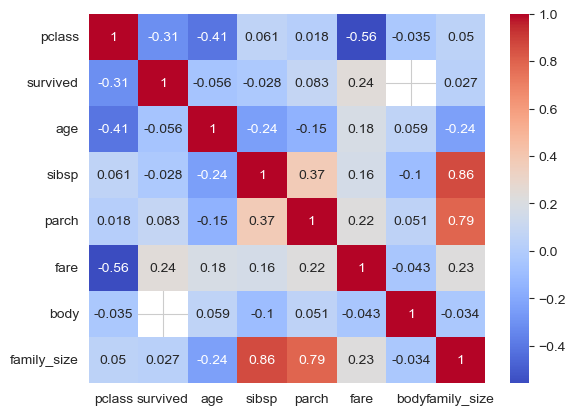

In [48]:
sns.heatmap(df[numeric_attributes].corr(), annot=True, cmap='coolwarm')

 This can also be done using the style.background_gradient() method from Pandas.

<span style="color:red"> - what conclusion can you draw from the correlation matrix? E.g., was age vs survided expectable or...?</span>

<span style="color:red"> - Would you be expecting a "high" correlation between age and body?</span>

<span style="color:red"> -Why is correlation between survived and body `nan`?</span>

In [49]:
#numeric_attributes = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_attributes].corr().style.background_gradient(cmap='coolwarm')

,pclass,survived,age,sibsp,parch,fare,body,family_size
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642,0.050027
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,nan,0.026876
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809,-0.240230
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961,0.861952
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099,0.792296
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110,0.226492
body,-0.034642,nan,0.058809,-0.099961,0.051099,-0.043110,1.000000,-0.033628
family_size,0.050027,0.026876,-0.240230,0.861952,0.792296,0.226492,-0.033628,1.000000


Another to have a good idea of the correlation between the numerical columns is to make a scatter plot matrix. Although in the case, due to the discrete nature of the data, the scatter plot matrix is not very useful/easy to interpret. Further, the scatter plot does not show the density of the data (e.g., you can not conclude from the scatter plot that the majority of the passengers were in the 3rd class, although the histogram of the pclass column shows that this is the case).

<span style="color:red"> - can you discerne the "higher" correlations?   </span>

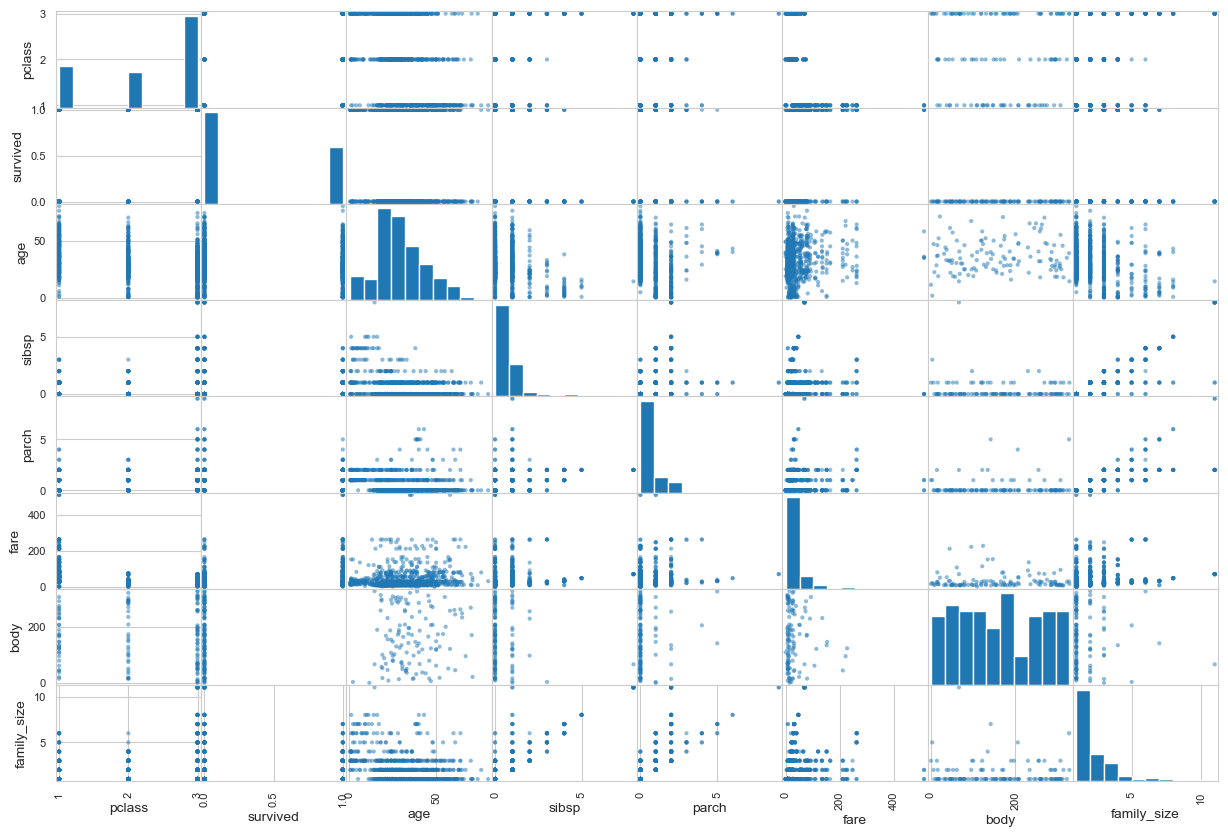

In [50]:
_ = pd.plotting.scatter_matrix(df, figsize=(15, 10))

#### Spearman's rank correlation

The Spearman's rank correlation is a nonparametric measure of the monotonicity of the relationship between two variables.  The Spearman's rank correlation is calculated using the following formula:
$$\text{corr}(x,y) = \frac{\text{cov}(\text{rank}(x),\text{rank}(y))}{\sigma_{\text{rank}(x)} \sigma_{\text{rank}(y)}}$$
where $\text{rank}(x)$ is the rank of the variable $x$ and $\sigma_{\text{rank}(x)}$ is the standard deviation of the rank of the variable $x$.

For the Spearman's rank correlation, the variables do not need to be normally distributed. The Spearman's rank correlation is a monotonic measure, so it is not affected by the outliers. The Spearman's rank correlation is also not affected by the monotonic transformation of the variables.

For example

In [51]:
df[numeric_attributes].corr(method='spearman').style.background_gradient(cmap='coolwarm')

,pclass,survived,age,sibsp,parch,fare,body,family_size
pclass,1.000000,-0.309734,-0.395892,-0.066679,-0.028752,-0.709019,-0.032555,-0.089363
survived,-0.309734,1.000000,-0.041672,0.083620,0.162086,0.294016,nan,0.170109
age,-0.395892,-0.041672,1.000000,-0.129929,-0.216097,0.192676,0.021058,-0.172706
sibsp,-0.066679,0.083620,-0.129929,1.000000,0.438373,0.445566,-0.051062,0.848278
parch,-0.028752,0.162086,-0.216097,0.438373,1.000000,0.400301,0.001960,0.795863
fare,-0.709019,0.294016,0.192676,0.445566,0.400301,1.000000,0.035504,0.521212
body,-0.032555,nan,0.021058,-0.051062,0.001960,0.035504,1.000000,-0.007864
family_size,-0.089363,0.170109,-0.172706,0.848278,0.795863,0.521212,-0.007864,1.000000


In [52]:
df[numeric_attributes].rank().sort_values(by='age') # 1-323

,pclass,survived,age,sibsp,parch,fare,body,family_size
30,955.0,1059.5,1.0,1051.0,1229.0,763.5,NaN,1206.0
882,955.0,405.0,2.0,446.0,1229.0,646.0,NaN,1105.0
214,955.0,1059.5,3.0,446.0,1087.5,431.5,NaN,908.0
277,462.0,1059.5,4.0,1051.0,1087.5,667.0,NaN,1105.0
1145,955.0,405.0,6.0,1051.0,1087.5,632.0,NaN,1105.0
...,...,...,...,...,...,...,...,...
1294,955.0,405.0,NaN,446.0,501.5,391.5,NaN,395.5
1298,955.0,405.0,NaN,446.0,501.5,108.5,NaN,395.5
1302,955.0,405.0,NaN,446.0,501.5,65.0,NaN,395.5
1303,955.0,405.0,NaN,446.0,501.5,659.5,NaN,395.5


# Exercises

[05_exercise_adult_part_1.ipynb](05_exercise_adult_part_1.ipynb)

# References

- https://www.kaggle.com/learn/pandas
- Navlani, A.,  Fandango, A.,  Idris, I. (2021). Python Data Analysis: Perform data collection, data processing, wrangling, visualization, and model building using Python. Packt. 3rd Edition
- Brandt. S. (2014). Data Analysis: Statistical and Computational Methods for Scientists and Engineers. Springer. 4th Edition
- https://eugenelohh.medium.com/data-analysis-on-the-titanic-dataset-using-python-7593633135f2
